In [1]:
import pandas as pd 
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [3]:
IMAGE_FOLDER = 'train_images/'

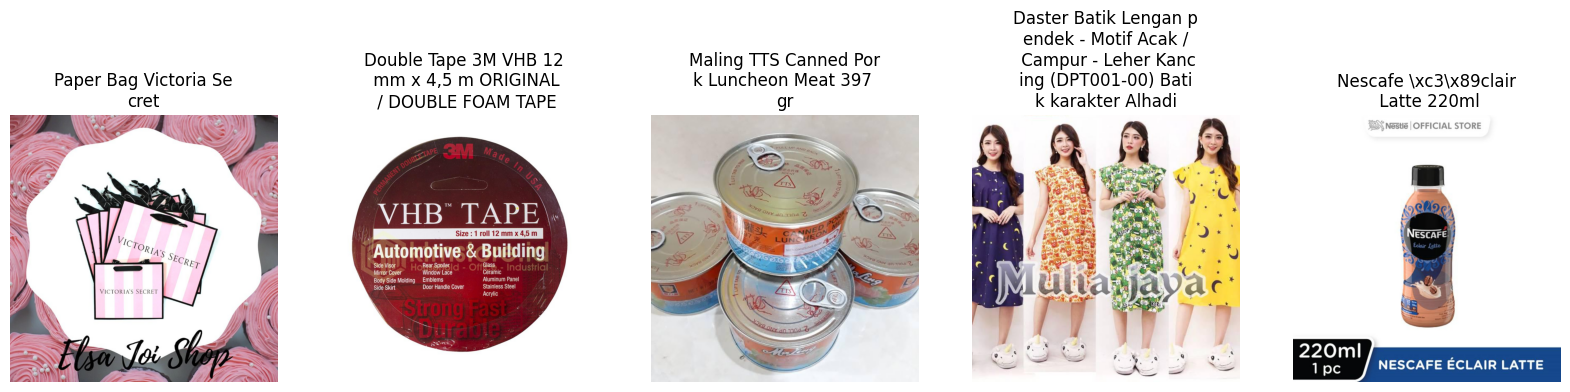

In [ ]:
def display(df, n_cols = 6, n_rows = 4, random = True):
    for i in range(n_rows):
        plt.figure(figsize = (20, 5))
        for j in range(n_cols):
            if random:
                idx = np.random.randint(0, len(df))
            else:
                idx = i * n_cols + j
                
            name = df.iloc[idx, 1] #get image file name (in csv file)
            title = df.iloc[idx, 3] # get image title (ing csv file)
            
            image_path = IMAGE_FOLDER + name
            image = cv2.imread(image_path)
            image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            title_display = ""
            for k, c in enumerate(title):
                title_display += c 
                if (k != 0 ) and ( k % 20 == 0 ):
                    title_display += '\n'

            plt.subplot(1, n_cols, j + 1)
            plt.title(title_display)
            plt.axis('off')
            plt.imshow(image)
        plt.show()
display(df, random = False)

top 1 duplicate group


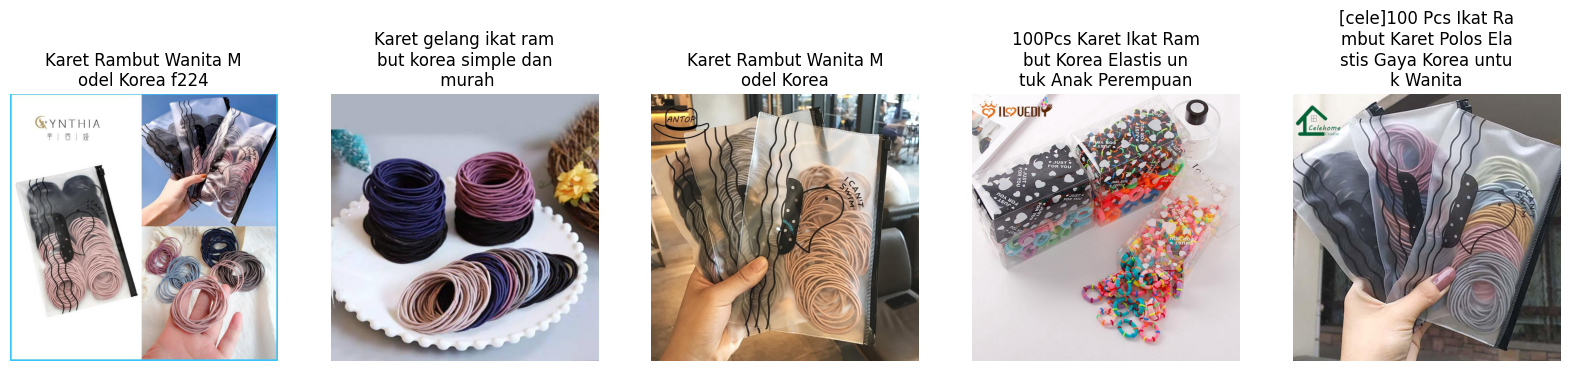

top 2 duplicate group


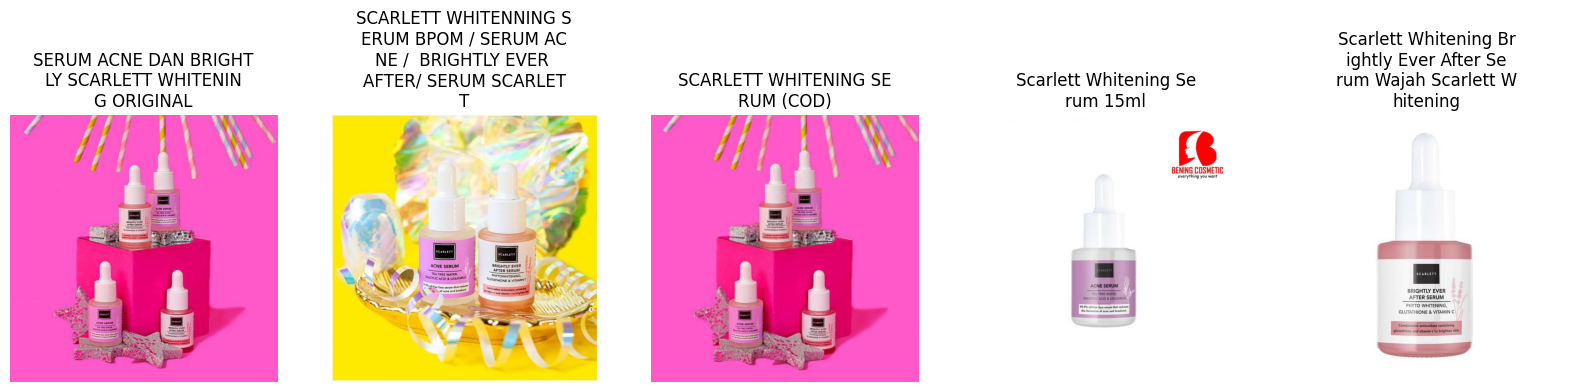

top 3 duplicate group


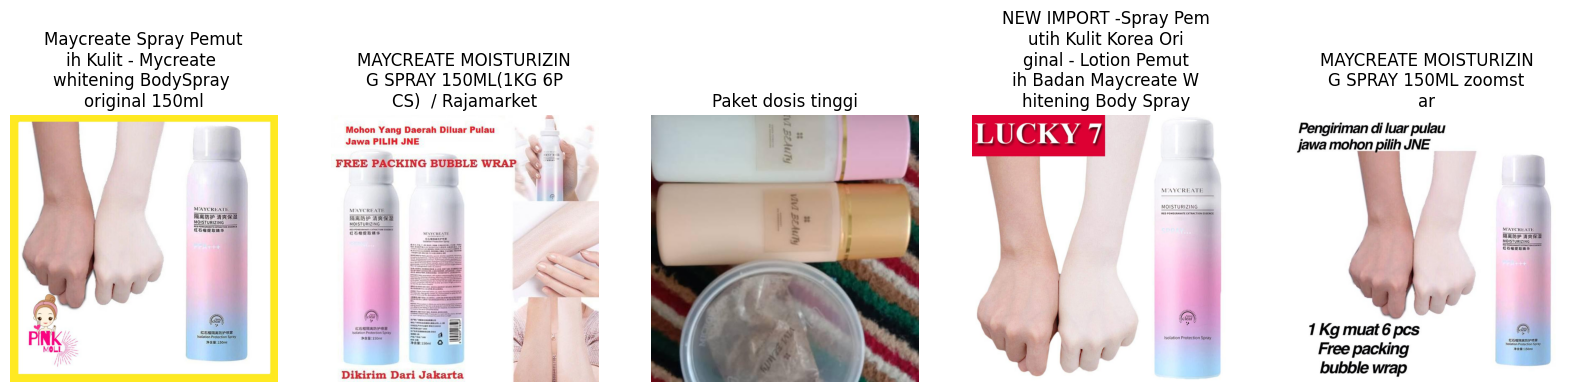

top 4 duplicate group


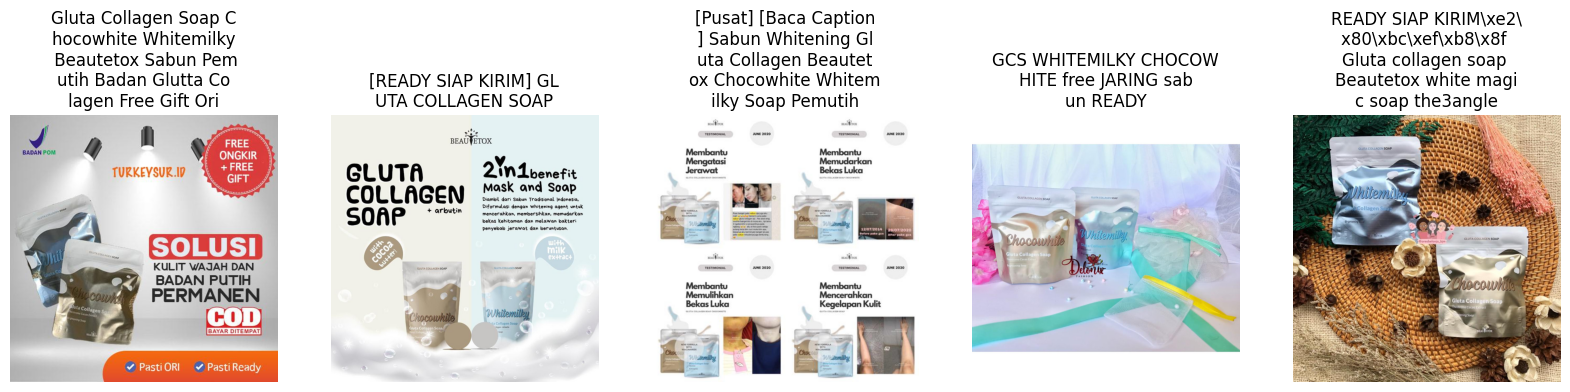

top 5 duplicate group


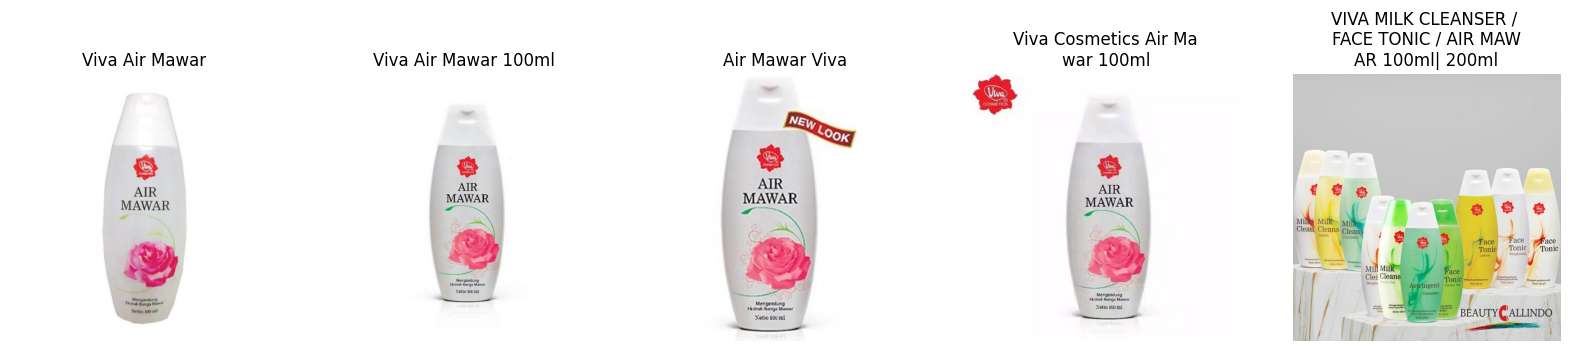

In [50]:
groups = df.label_group.value_counts() # count number of image in each class and sort in ascending order
for i in range(5):
    print('=' * 40)
    print(f'top {i + 1} duplicate group')
    data = df[df['label_group'] == groups.index[i]]
    display(data, n_rows = 1, n_cols = 5,random = True)
    

In [9]:
tmp = df.groupby('label_group').posting_id.agg('unique').to_dict()
df['true_pred'] = df['label_group'].map(tmp)
df['true_pred']

In [11]:
tmp_phash = df.groupby('image_phash').posting_id.agg('unique').to_dict()
df['phash_pred'] = df['image_phash'].map(tmp_phash)
df['phash_pred']

0         [train_129225211]
1        [train_3386243561]
2        [train_2288590299]
3        [train_2406599165]
4        [train_3369186413]
                ...        
34245    [train_4028265689]
34246     [train_769054909]
34247     [train_614977732]
34248    [train_3630949769]
34249    [train_1792180725]
Name: phash_pred, Length: 34250, dtype: object